<a href="https://colab.research.google.com/github/fallmorfall/CheckPoint/blob/main/CheckPoint_2_ANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# 1. Charger les données
df = pd.read_csv('Microsoft_malware_dataset_min.csv')
df

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18
...,...,...,...,...,...,...,...,...,...,...
99995,0,0.0,0.0,Core,0,1.0,0.0,1.0,th1,177
99996,1,0.0,0.0,Professional,1,1.0,0.0,1.0,rs4,206
99997,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs3,93
99998,0,NaN,0.0,CoreSingleLanguage,0,1.0,0.0,1.0,rs4,29


In [ ]:
# 2. Exploration des données
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,CountryIdentifier
count,100000.000000,96585.000000,99815.000000,100000.000000,98924.000000,94068.000000,99609.000000,100000.000000
mean,0.499280,0.281607,0.006642,0.075850,0.977326,0.000351,0.944864,108.188050
std,0.500002,0.449785,0.081230,0.264759,0.148863,0.018727,0.228246,62.989406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,51.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,97.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,162.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,222.000000


In [ ]:
# 3. Gérer les valeurs manquantes
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].fillna(df[col].mode()[0])
  else:
    df[col] = df[col].fillna(df[col].mean())
df

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.000000,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.000000,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.000000,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.000000,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.000000,0.0,Core,0,1.0,0.0,1.0,rs4,18
...,...,...,...,...,...,...,...,...,...,...
99995,0,0.000000,0.0,Core,0,1.0,0.0,1.0,th1,177
99996,1,0.000000,0.0,Professional,1,1.0,0.0,1.0,rs4,206
99997,0,0.000000,0.0,Professional,0,1.0,0.0,1.0,rs3,93
99998,0,0.281607,0.0,CoreSingleLanguage,0,1.0,0.0,1.0,rs4,29


In [ ]:
# 4. Encodage des variables catégorielles
encodeur = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = encodeur.fit_transform(df[col])
df

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.000000,0.0,11,0,1.0,0.0,1.0,4,29
1,0,0.000000,0.0,11,0,1.0,0.0,1.0,4,93
2,0,0.000000,0.0,1,0,1.0,0.0,1.0,4,86
3,1,0.000000,0.0,11,0,1.0,0.0,1.0,4,88
4,1,0.000000,0.0,1,0,1.0,0.0,1.0,4,18
...,...,...,...,...,...,...,...,...,...,...
99995,0,0.000000,0.0,1,0,1.0,0.0,1.0,5,177
99996,1,0.000000,0.0,11,1,1.0,0.0,1.0,4,206
99997,0,0.000000,0.0,11,0,1.0,0.0,1.0,3,93
99998,0,0.281607,0.0,4,0,1.0,0.0,1.0,4,29


In [ ]:
# 5. Séparer les données en train/test
x = df.drop(['HasDetections'], axis=1)
y = df['HasDetections']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

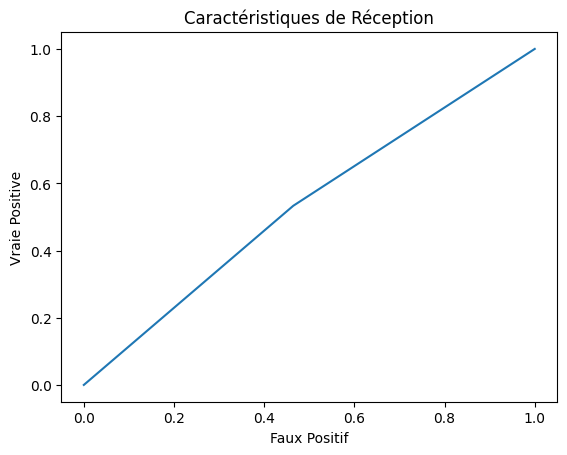

In [ ]:
# 6. arbre de décision
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# La courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('Faux Positif')
plt.ylabel('Vraie Positive')
plt.title('Caractéristiques de Réception')
plt.show()

In [ ]:
#accurance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Précision du modèle : {accuracy:.2f}')


Précision du modèle : 0.53


In [ ]:
# Suppression de la variable cible
X = df.drop(columns=['HasDetections'])


In [ ]:
# L'algorithme K-Means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

df['Cluster'] = kmeans.labels_

# Afficher les clusters
df[['Cluster']]


,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
99995,2
99996,2
99997,0
99998,0


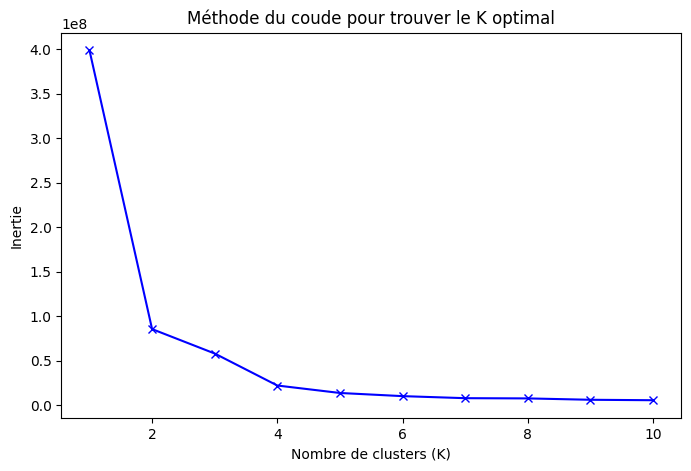

In [ ]:
# Calcule de l'inertie pour différents K
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

#  courbe du coude
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, 'bx-')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour trouver le K optimal')
plt.show()
